<a href="https://colab.research.google.com/github/Hash-if-vs/AI-Indian-Legal-Assistant/blob/main/PerplexityOfIndianLegalLlama2_7b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install accelerate==0.21.0 transformers==4.31.0 tokenizers==0.13.3
!pip install bitsandbytes==0.40.0 einops==0.6.1
!pip install xformers==0.0.22.post7
!pip install sentence_transformers
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 89.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 35.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1

In [ ]:
import torch
from transformers import AutoModelForCausalLM, LlamaTokenizer
import bitsandbytes as bnb

model_name = 'Hashif/Indian-legal-Llama-2-7b-v2'

tokenizer = LlamaTokenizer.from_pretrained(model_name)

free_in_GB = int(torch.cuda.mem_get_info()[0]/1024**3)
max_memory = f'{int(torch.cuda.mem_get_info()[0]/1024**3)-2}GB'

n_gpus = torch.cuda.device_count()
max_memory = {i: max_memory for i in range(n_gpus)}

model = AutoModelForCausalLM.from_pretrained(
  model_name,
  device_map='auto',
  load_in_4bit=True,
  max_memory=max_memory,
  do_sample=True,
  torch_dtype="auto"
)


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda122.so
CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching in backup paths...
CUDA SETUP: CUDA runtime path found: /usr/local/cuda/lib64/libcudart.so
CUDA SETUP: Highest compute capability among GPUs detected: 7.5
CUDA SETUP: Detected CUDA version 122
CUDA SETUP: Loading binary /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda122.so...


/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: /usr/lib64-nvidia did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('http'), PosixPath('8013'), PosixPath('//172.28.0.1')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('//colab.research.google.com/tun/m/cc483011

tokenizer_config.json:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/437 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/634 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


pytorch_model.bin.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


generation_config.json:   0%|          | 0.00/183 [00:00<?, ?B/s]

You are calling `save_pretrained` to a 4-bit converted model, but your `bitsandbytes` version doesn't support it. If you want to save 4-bit models, make sure to have `bitsandbytes>=0.41.3` installed.


In [ ]:
from datasets import load_dataset
test = load_dataset("Hashif/indianlegal-llama-2",split='test')
from random import shuffle
from datasets import Dataset
import pandas as pd
df=test.to_pandas()
df=df.drop(columns=['__index_level_0__'])
word_to_remove = 'Summarize:'

# Function to check if any cell in a row contains the word to remove
def contains_word(row):
    return not any(word_to_remove in cell for cell in row)

# Apply the filter to remove rows containing the word
filtered_df = df[df.apply(contains_word, axis=1)]
dataset=Dataset.from_dict(filtered_df)
encodings = tokenizer("\n\n".join(dataset["text"]), return_tensors="pt")

Generating train split:   0%|          | 0/11359 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1263 [00:00<?, ? examples/s]

In [ ]:
import torch
from tqdm import tqdm

max_length = model.config.max_length
stride = 512
seq_len = encodings.input_ids.size(1)
device = "cuda"

nlls = []
nllses = []
prev_end_loc = 0
for begin_loc in tqdm(range(0, seq_len, stride)):
    end_loc = min(begin_loc + max_length, seq_len)
    trg_len = end_loc - prev_end_loc  # may be different from stride on last loop
    input_ids = encodings.input_ids[:, begin_loc:end_loc].to(device)
    target_ids = input_ids.clone()
    target_ids[:, :-trg_len] = -100

    with torch.no_grad():
        outputs = model(input_ids, labels=target_ids)

        # loss is calculated using CrossEntropyLoss which averages over valid labels
        # N.B. the model only calculates loss over trg_len - 1 labels, because it internally shifts the labels
        # to the left by 1.
        neg_log_likelihood = outputs.loss

    nlls.append(neg_log_likelihood)
    nllses.append(neg_log_likelihood.cpu().numpy())  # Move to CPU and convert to numpy


    prev_end_loc = end_loc
    if end_loc == seq_len:
        break

ppl = torch.exp(torch.stack(nlls).mean())


100%|██████████| 451/451 [03:19<00:00,  2.26it/s]


In [ ]:
#V2 model on the whole dataset
ppl

tensor(19.4533, device='cuda:0')

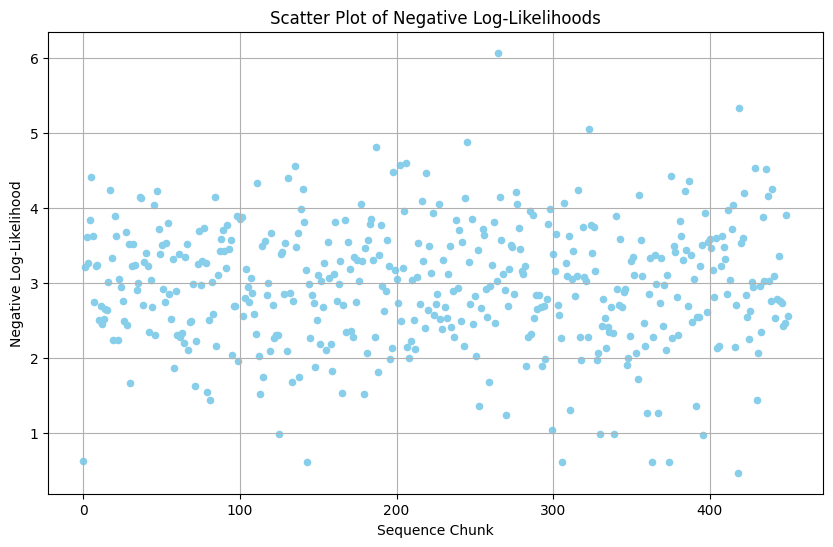

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(range(len(nllses)), nllses, color='skyblue', marker='o', s=20)  # s is the size of the markers
plt.title('Scatter Plot of Negative Log-Likelihoods')
plt.xlabel('Sequence Chunk')
plt.ylabel('Negative Log-Likelihood')
plt.grid(True)
plt.show()